In [174]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

In [175]:
# Load the data
url= "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%202/data/FuelConsumptionCo2.csv"
df = pd.read_csv(url)
df.sample(5)

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
174,2014,CADILLAC,CTS-V COUPE,MID-SIZE,6.2,8,M6,Z,16.7,12.5,14.8,19,340
571,2014,JEEP,CHEROKEE 4X4,SUV - SMALL,2.4,4,A9,X,11.3,8.3,10.0,28,230
943,2014,SUBARU,BRZ,MINICOMPACT,2.0,4,M6,Z,11.0,7.9,9.6,29,221
483,2014,HONDA,ACCORD,MID-SIZE,2.4,4,M6,X,10.1,6.9,8.7,32,200
991,2014,TOYOTA,RAV4 AWD,SUV - SMALL,2.5,4,AS6,X,10.4,8.1,9.4,30,216


In [176]:
# describe the statistical data
df.describe()

,MODELYEAR,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
count,1067.0,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000
mean,2014.0,3.346298,5.794752,13.296532,9.474602,11.580881,26.441425,256.228679
std,0.0,1.415895,1.797447,4.101253,2.794510,3.485595,7.468702,63.372304
min,2014.0,1.000000,3.000000,4.600000,4.900000,4.700000,11.000000,108.000000
25%,2014.0,2.000000,4.000000,10.250000,7.500000,9.000000,21.000000,207.000000
50%,2014.0,3.400000,6.000000,12.600000,8.800000,10.900000,26.000000,251.000000
75%,2014.0,4.300000,8.000000,15.550000,10.850000,13.350000,31.000000,294.000000
max,2014.0,8.400000,12.000000,30.200000,20.500000,25.800000,60.000000,488.000000


In [177]:
# describe more info about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1067 entries, 0 to 1066
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   MODELYEAR                 1067 non-null   int64  
 1   MAKE                      1067 non-null   object 
 2   MODEL                     1067 non-null   object 
 3   VEHICLECLASS              1067 non-null   object 
 4   ENGINESIZE                1067 non-null   float64
 5   CYLINDERS                 1067 non-null   int64  
 6   TRANSMISSION              1067 non-null   object 
 7   FUELTYPE                  1067 non-null   object 
 8   FUELCONSUMPTION_CITY      1067 non-null   float64
 9   FUELCONSUMPTION_HWY       1067 non-null   float64
 10  FUELCONSUMPTION_COMB      1067 non-null   float64
 11  FUELCONSUMPTION_COMB_MPG  1067 non-null   int64  
 12  CO2EMISSIONS              1067 non-null   int64  
dtypes: float64(4), int64(4), object(5)
memory usage: 108.5+ KB


In [178]:
# Your task will be to create a simple linear regression model from one of these features to
#  predict CO2 emissions of unobserved cars based on that feature.

# OBSERVATIONS:
# MODELYEAR has 0 standard deviation, and thus has no interesting information content.
# The max in FUELCONSUMPTION_CITY is much much higher than the 75% so this means this could be and OUTLIER


In [179]:
# PREPROCESSING

# drop the model year since its std is 0 thus it is not interesting
# drop the MAKE, MODEL and VEHICLECLASS cause they seem to not be related to the targeted output logically
df.drop(columns= ["MODELYEAR", "MAKE", "MODEL", "VEHICLECLASS", "TRANSMISSION"], inplace = True)

# now label encode the FUELTYPE
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
fuelTypeEncoded = pd.DataFrame(le.fit_transform(df["FUELTYPE"].values), columns=["FUELTYPEENCODED"])
df = pd.concat([df, fuelTypeEncoded], axis = 1)
# now there is no need to keep the FUELTYPE SO just drop it
df.drop(columns= "FUELTYPE", inplace = True)
df.sample(5)

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS,FUELTYPEENCODED
999,2.7,4,13.1,10.5,11.9,24,274,2
715,2.5,4,8.8,6.2,7.6,37,175,2
842,4.0,6,15.7,11.2,13.7,21,315,2
759,5.5,8,17.7,13.4,15.8,18,363,3
93,2.0,4,10.6,7.2,9.1,31,209,3


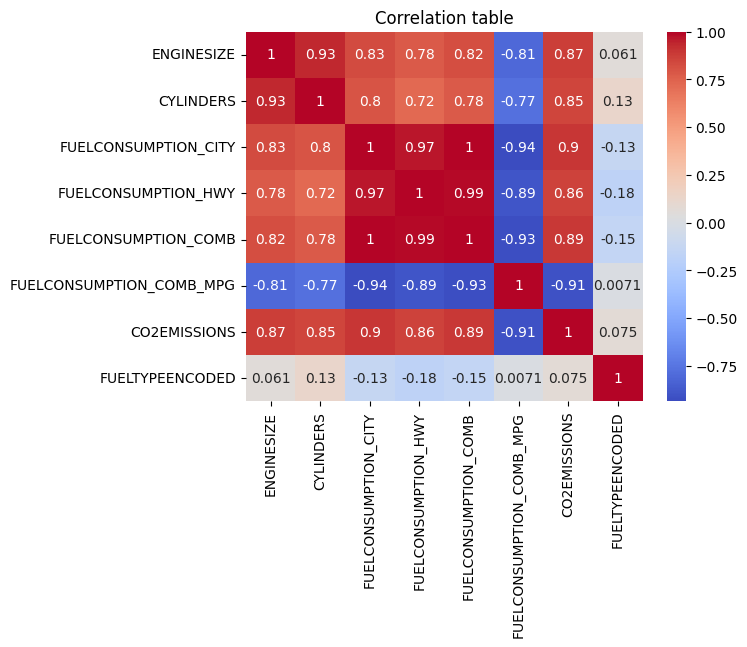

In [180]:
# Now print the correlation table and plot the heatmap
corr = df.corr()

sb.heatmap(corr, cmap = "coolwarm", annot = True)
plt.title("Correlation table")
plt.show()

In [181]:
# OBSERVATIONS: 
# all three types of FUELCONSUMPTION are highly correlated with CO2EMISSIONS and 
# with each other
# so ill only pick the FUELCONSUMPTION_COMB SINCE WE ARE WORKING WITH SIMPLE LINEAR REGRESSION

X = df[["FUELCONSUMPTION_COMB"]].to_numpy
y = df["CO2EMISSIONS"].to_numpy

TypeError: float() argument must be a string or a real number, not 'method'

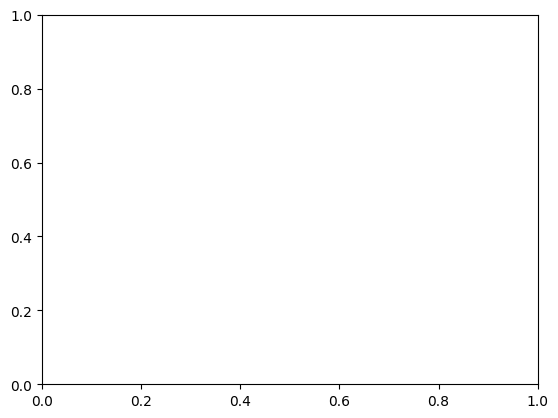

In [ ]:
# plot the relation between the two
plt.scatter(df.FUELCONSUMPTION_COMB, df.CO2EMISSIONS, color = "blue")
plt.xlabel("FUELCONSUMPTION_COMB")
plt.ylabel("CO2EMISSIONS")
plt.title("SCATTER REPRESENTATION OF THE FUELCONSxCO2EMISSIONS")
plt.show()